In [1]:
import numpy
import matplotlib.pyplot as pylot
import pandas
import seaborn
%matplotlib inline

In [2]:
df = pandas.read_csv('../data/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df[df["age"] > 40] 

,age,bought_insurance
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1
14,49,1
15,55,1


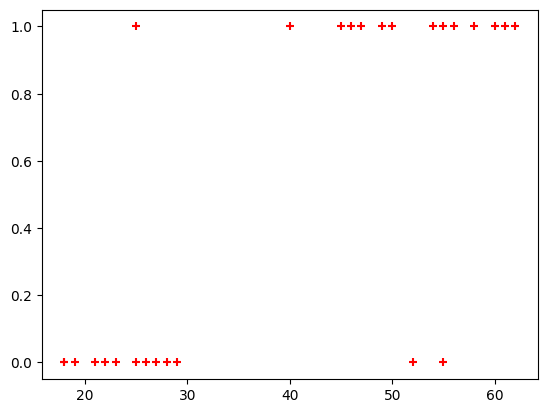

In [4]:
pylot.scatter(df["age"], df["bought_insurance"], marker='+', color="r")
pylot.show()

In [5]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df[['age']], df['bought_insurance'], train_size=0.9)
print(df.shape)

(27, 2)


In [6]:
train_x.head()

,age
14,49
18,19
20,21
1,25
8,62


In [7]:
pandas.DataFrame(test_y)

,bought_insurance
0,0
17,1
16,1


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [9]:
model.fit(train_x, train_y)

LogisticRegression()

In [10]:
test_x

,age
0,22
17,58
16,25


In [11]:
model.predict(test_x)

array([0, 1, 0], dtype=int64)

In [12]:
model.score(test_x, test_y)

0.6666666666666666

In [13]:
model.predict_proba(test_x)

array([[0.96283456, 0.03716544],
       [0.05859099, 0.94140901],
       [0.94002023, 0.05997977]])

### Exercise

In [14]:
df = pandas.read_csv('../data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
left_0 = df[df["left"] == 0]
left_0.shape

(11428, 10)

In [16]:
left_1 = df[df["left"] == 1]
left_1.shape

(3571, 10)

In [17]:
mean_0 = int(numpy.mean(df.groupby('left').get_group(0).index))
pandas.DataFrame(df[df['left'] == 0].loc[mean_0]).transpose()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7811,0.94,0.55,3,160,3,0,0,0,sales,low


In [18]:
mean_1 = int(numpy.mean(df.groupby('left').get_group(1).index))
# pandas.DataFrame(df[df['left'] == 1].loc[mean_1]).transpose()
mean_1

6499

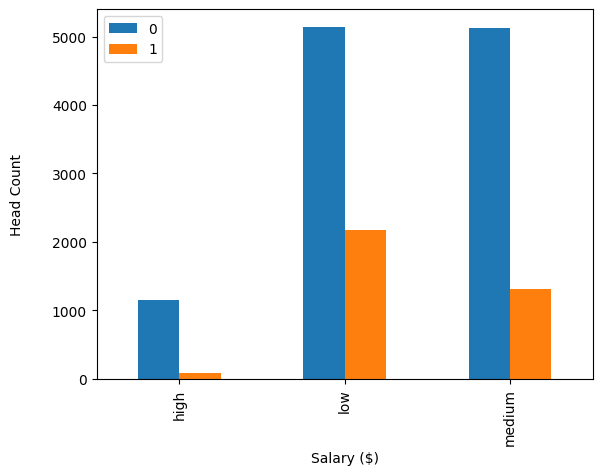

In [19]:
pandas.crosstab(df["salary"], df["left"]).plot(kind='bar')

pylot.xlabel("Salary ($)")
pylot.ylabel("Head Count", labelpad=20)

pylot.legend(loc="upper left")

pylot.show()

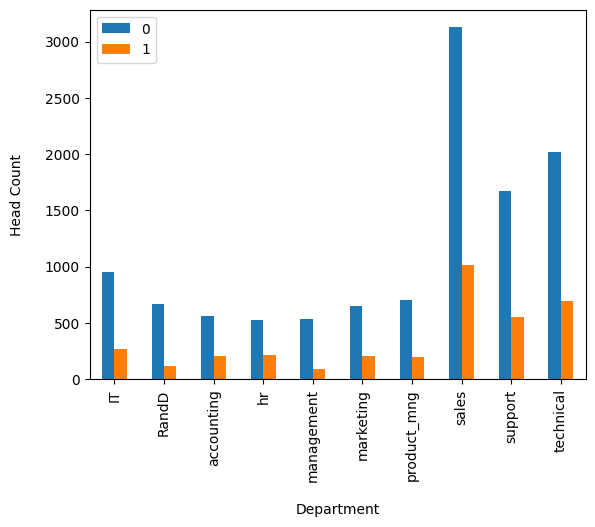

In [20]:
pandas.crosstab(df["Department"], df["left"]).plot(kind='bar')

pylot.xlabel("Department", labelpad=15)
pylot.ylabel("Head Count", labelpad=15)
pylot.legend(loc="upper left")

pylot.show()

In [21]:
sub_df = df[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [22]:
salary_dummies = pandas.get_dummies(sub_df["salary"], prefix="salary")
df_dummies = pandas.concat([sub_df, salary_dummies], axis=1)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [23]:
df_dummies.drop('salary', axis='columns', inplace=True)

In [24]:
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [25]:
left = df["left"]
left.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_dummies, left, train_size=0.3)

In [27]:
print(f"x_train = 30% : {x_train.size}")
print(f"x_test = 70% : {x_test.size}", "\n")
print(f"y_train = 30% : {y_train.size}")
print(f"y_test = 70% : {y_test.size}")

x_train = 30% : 26994
x_test = 70% : 63000 

y_train = 30% : 4499
y_test = 70% : 10500


In [28]:
model.fit(x_train, y_train)

LogisticRegression()

In [29]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
model.score(x_test, y_test)

0.7791428571428571

In [31]:
model.predict_proba(x_test)

array([[0.83996249, 0.16003751],
       [0.78850669, 0.21149331],
       [0.24453162, 0.75546838],
       ...,
       [0.84120371, 0.15879629],
       [0.83327272, 0.16672728],
       [0.91398646, 0.08601354]])

### Multiclass Classification

In [32]:
from sklearn.datasets import load_digits

digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [33]:
digits["data"][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [34]:
digits["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

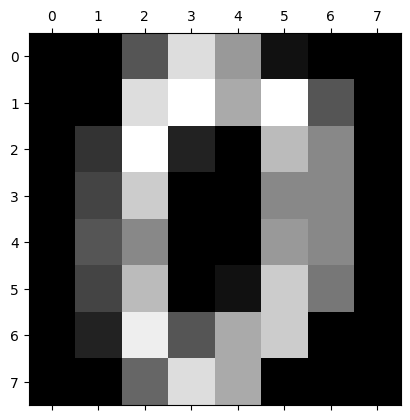

In [35]:
pylot.gray()
pylot.matshow(digits["images"][0])
pylot.show()

In [36]:
digits["target"][:5]

array([0, 1, 2, 3, 4])

In [37]:
digits["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits["data"], digits["target"], test_size=0.2)

In [39]:
x_train.size

91968

In [40]:
x_test.size

23040

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.score(x_test, y_test)

0.9638888888888889

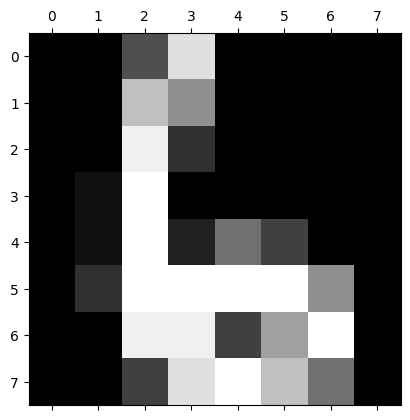

In [51]:
pylot.matshow(digits["images"][67])

In [53]:
print(digits["data"], "\n")
print(digits["target"][0])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

0


In [54]:
model.predict([digits["data"][67]])

array([6])

In [55]:
model.predict(digits['data'][:5])

array([0, 1, 2, 3, 4])

In [50]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 33,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 30]], dtype=int64)

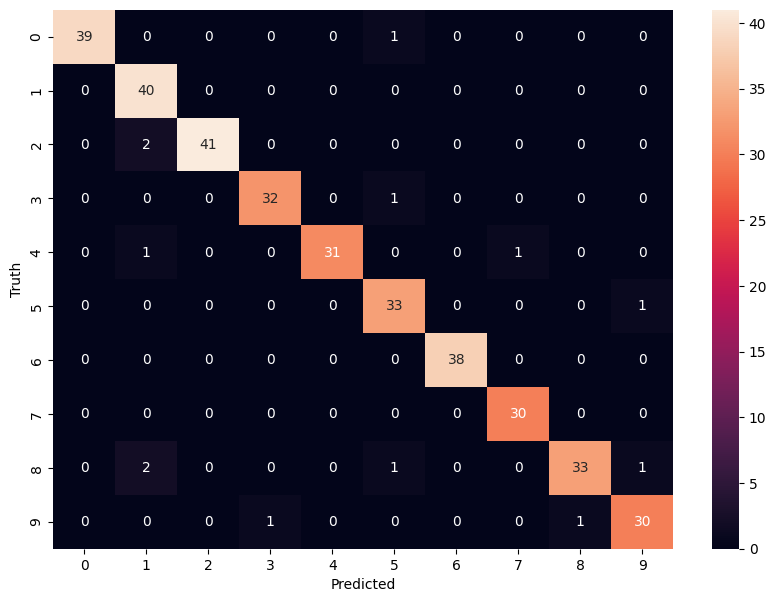

In [58]:
import seaborn

pylot.figure(figsize=(10, 7))
seaborn.heatmap(cm, annot=True)

pylot.xlabel('Predicted')
pylot.ylabel('Truth')

pylot.show()